# ![Untitled.png](attachment:Untitled.png)

# Random Forest is Bagging Ensemble Technique

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# Read the dataset

In [2]:
import pandas as pd
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
s=df.isna().sum()

In [6]:
df.duplicated().sum()

0

In [5]:
s

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for Drug'}, xlabel='Drug'>

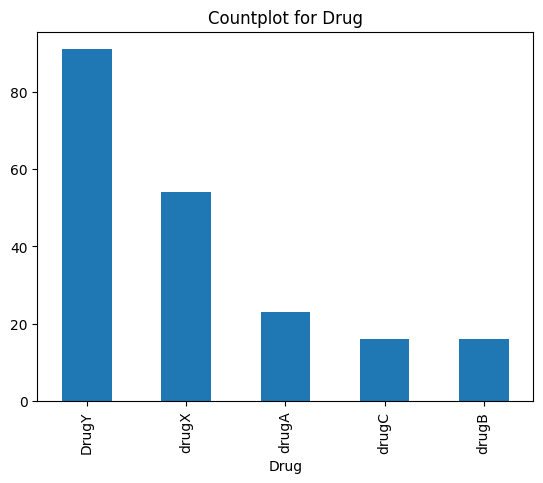

In [8]:
df['Drug'].value_counts().plot(kind='bar', title='Countplot for Drug')

# Seperate X and Y features

In [9]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [10]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [11]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


 # Seperate Cat and Con features

In [12]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [13]:
cat

['Sex', 'BP', 'Cholesterol']

In [14]:
con

['Age', 'Na_to_K']

# Create a preprocessing pipeline for X


    ### 1. num_pipe -a. SimpleImputer strategy='mean' or 'median' b. standardscaler
    ### 2.cat_pipe -a. SimpleImputer strategy='most_frequent' or 'constant' b. OneHotEncoder


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

cat_pipe = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)])

In [17]:


pre



ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [18]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [19]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [20]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Apply Train test split

In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [22]:
xtrain.shape

(140, 9)

In [23]:
xtest.shape

(60, 9)

In [24]:
xtrain.head()

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
169,-1.473377,-0.669244,1.0,0.0,1.0,0.0,0.0,1.0,0.0
97,0.708057,1.292073,1.0,0.0,1.0,0.0,0.0,1.0,0.0
31,1.798775,-0.904468,0.0,1.0,1.0,0.0,0.0,1.0,0.0
12,-0.079683,-0.098320,0.0,1.0,0.0,1.0,0.0,1.0,0.0
35,0.102103,-1.221155,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [25]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [26]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


In [27]:
ytrain.value_counts()

Drug 
DrugY    65
drugX    36
drugA    16
drugB    13
drugC    10
Name: count, dtype: int64

In [28]:
ytest.value_counts()

Drug 
DrugY    26
drugX    18
drugA     7
drugC     6
drugB     3
Name: count, dtype: int64

# Create a random forest model

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=1, max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='gini')
model.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=1)

In [31]:
model.score(xtrain,ytrain)

0.7214285714285714

In [32]:
model.score(xtest,ytest)

0.7333333333333333

# Hyperparameter tuning with Randomised Search CV

# 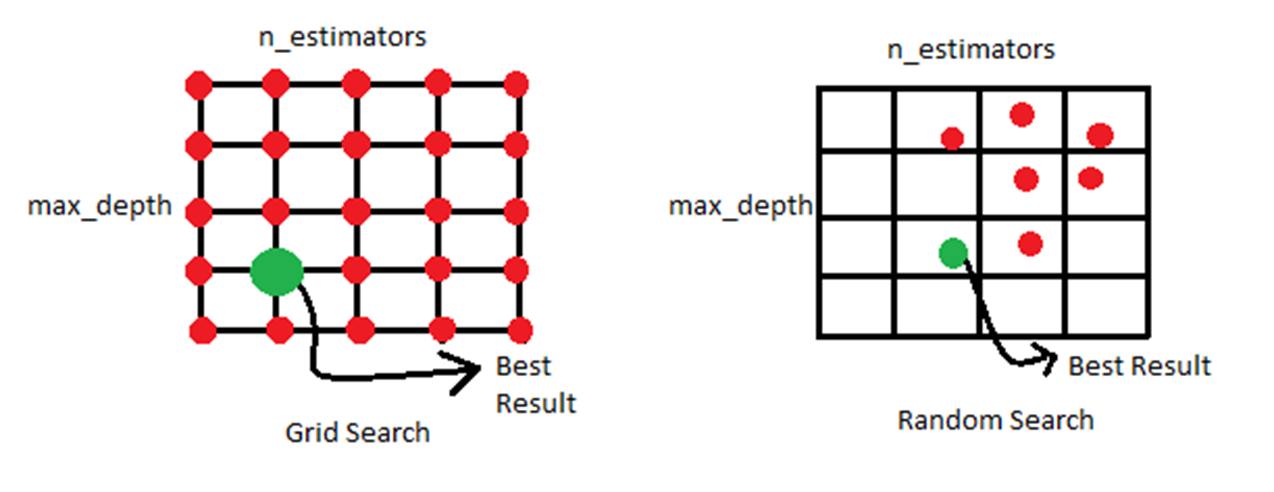

# Randomized search cv is faster compared to gridsearchcv

In [33]:
params = {'n_estimators':[10, 50, 100, 200],
          'max_depth':[2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9],
          'criterion':['gini', 'entropy']}

In [34]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv = RandomizedSearchCV(rfc, param_distributions=params, cv=5, scoring='f1_macro')
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [35]:
rscv.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'max_depth': 5,
 'criterion': 'gini'}

In [36]:
rscv.best_score_

0.9862857142857143

In [37]:
best_rfc = rscv.best_estimator_
best_rfc

RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=50)

# Evaluate Model in train and test

In [38]:
best_rfc.score(xtrain, ytrain)

1.0

In [39]:
best_rfc.score(xtest, ytest)

1.0

# Predict results for train and test

In [40]:
ypred_tr = best_rfc.predict(xtrain)
ypred_ts = best_rfc.predict(xtest)

In [41]:
ypred_tr[0:5]

array(['drugA', 'DrugY', 'drugB', 'DrugY', 'drugX'], dtype=object)

In [42]:
ytrain.head()

,Drug
169,drugA
97,DrugY
31,drugB
12,DrugY
35,drugX


In [43]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

In [44]:
ytest.head()

,Drug
95,drugX
15,DrugY
30,drugX
158,drugC
128,DrugY


# Create confusion matrix for test results

In [45]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

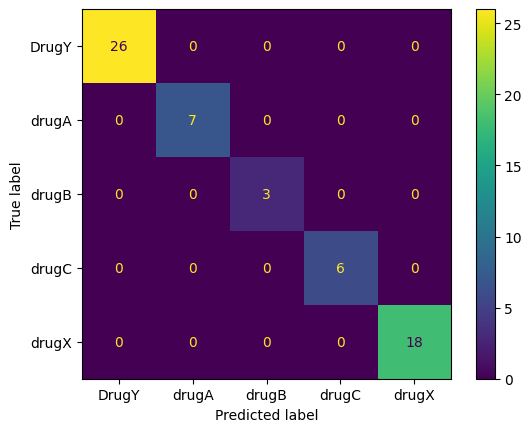

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_rfc.classes_)
cfd.plot()

# Create a classification report

### Predict probabilites

In [47]:
yprob_tr = best_rfc.predict_proba(xtrain)
yprob_ts = best_rfc.predict_proba(xtest)

In [48]:
best_rfc.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [49]:
yprob_ts[0:5]

array([[0.        , 0.038     , 0.01      , 0.0315    , 0.9205    ],
       [0.99666667, 0.00333333, 0.        , 0.        , 0.        ],
       [0.04972222, 0.02      , 0.        , 0.        , 0.93027778],
       [0.1652588 , 0.        , 0.07155556, 0.58595382, 0.17723182],
       [0.96233333, 0.        , 0.        , 0.00875   , 0.02891667]])

In [50]:
ypred_ts[0:5]

array(['drugX', 'DrugY', 'drugX', 'drugC', 'DrugY'], dtype=object)

# Feature importances

In [51]:
imp = best_rfc.feature_importances_
imp

array([0.13818945, 0.50742316, 0.00720984, 0.01181976, 0.13296607,
       0.05064149, 0.0804544 , 0.03341238, 0.03788344])

In [52]:
xtrain.columns

Index(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH',
       'cat__BP_LOW', 'cat__BP_NORMAL', 'cat__Cholesterol_HIGH',
       'cat__Cholesterol_NORMAL'],
      dtype='object')

In [53]:
imp = pd.Series(imp)
imp

0    0.138189
1    0.507423
2    0.007210
3    0.011820
4    0.132966
5    0.050641
6    0.080454
7    0.033412
8    0.037883
dtype: float64

In [54]:
imp.index = xtrain.columns
imp

num__Age                   0.138189
num__Na_to_K               0.507423
cat__Sex_F                 0.007210
cat__Sex_M                 0.011820
cat__BP_HIGH               0.132966
cat__BP_LOW                0.050641
cat__BP_NORMAL             0.080454
cat__Cholesterol_HIGH      0.033412
cat__Cholesterol_NORMAL    0.037883
dtype: float64

In [55]:
imp = imp.sort_values(ascending=False)
imp

num__Na_to_K               0.507423
num__Age                   0.138189
cat__BP_HIGH               0.132966
cat__BP_NORMAL             0.080454
cat__BP_LOW                0.050641
cat__Cholesterol_NORMAL    0.037883
cat__Cholesterol_HIGH      0.033412
cat__Sex_M                 0.011820
cat__Sex_F                 0.007210
dtype: float64

<Axes: title={'center': 'Feature Importances'}>

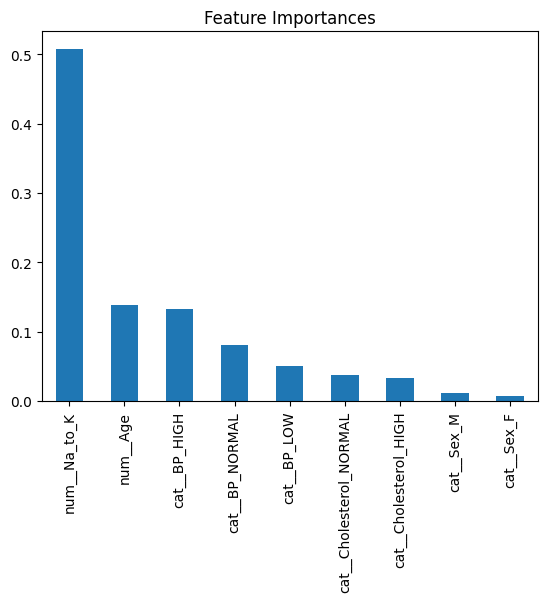

In [56]:
imp.plot(kind='bar', title='Feature Importances')

# Predicting Out of sample data

In [57]:
xnew = pd.read_csv('test_drugs.csv')
xnew

,Age,Sex,BP,Cholesterol,Na_to_K
0,26,M,LOW,NORMAL,20.909
1,35,F,HIGH,HIGH,12.894
2,48,M,HIGH,NORMAL,10.446
3,40,F,NORMAL,HIGH,10.103
4,16,M,LOW,HIGH,12.006
5,49,M,HIGH,NORMAL,8.700
6,58,F,LOW,HIGH,26.645
7,28,F,LOW,HIGH,13.127
8,50,F,NORMAL,NORMAL,17.211
9,23,M,LOW,HIGH,7.298


In [58]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          30 non-null     int64  
 1   Sex          30 non-null     object 
 2   BP           30 non-null     object 
 3   Cholesterol  30 non-null     object 
 4   Na_to_K      30 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.3+ KB


# Always apply pre.transform

In [59]:
xnew_pre = pre.transform(xnew)
xnew_pre[0:5]

array([[-1.10980481,  0.6695254 ,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  1.        ],
       [-0.56444618, -0.44276176,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.22329406, -0.78248465,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  1.        ],
       [-0.26146916, -0.83008471,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  0.        ],
       [-1.71575884, -0.56599457,  0.        ,  1.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  0.        ]])

In [60]:
xnew_pre = pd.DataFrame(xnew_pre, columns=cols)
xnew_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.109805,0.669525,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,-0.564446,-0.442762,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.223294,-0.782485,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,-0.261469,-0.830085,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,0.283889,-1.024787,0.0,1.0,1.0,0.0,0.0,0.0,1.0
6,0.829248,1.465543,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7,-0.988614,-0.410427,1.0,0.0,0.0,1.0,0.0,1.0,0.0
8,0.344485,0.156333,1.0,0.0,0.0,0.0,1.0,0.0,1.0
9,-1.291591,-1.219351,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Predict the results with probability

In [61]:
pred = best_rfc.predict(xnew_pre)
pred

array(['DrugY', 'drugA', 'drugA', 'drugX', 'drugC', 'drugA', 'DrugY',
       'drugC', 'DrugY', 'drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'drugB', 'drugC',
       'drugA', 'DrugY'], dtype=object)

In [62]:
prob = best_rfc.predict_proba(xnew_pre)
prob

array([[0.84333333, 0.        , 0.        , 0.03066667, 0.126     ],
       [0.07545238, 0.76194078, 0.11746398, 0.015     , 0.03014286],
       [0.04302742, 0.76539305, 0.14910334, 0.        , 0.04247619],
       [0.02797403, 0.02571429, 0.00714286, 0.00666667, 0.93250216],
       [0.01578644, 0.004     , 0.        , 0.93046356, 0.04975   ],
       [0.03552742, 0.68678716, 0.23035209, 0.004     , 0.04333333],
       [0.94490165, 0.        , 0.        , 0.03506494, 0.02003341],
       [0.09066234, 0.004     , 0.        , 0.80442208, 0.10091558],
       [0.85222222, 0.        , 0.        , 0.        , 0.14777778],
       [0.03078644, 0.012     , 0.        , 0.89946356, 0.05775   ],
       [0.05228355, 0.01371429, 0.03447619, 0.00888889, 0.89063709],
       [0.77342424, 0.00363636, 0.20693939, 0.        , 0.016     ],
       [0.95488095, 0.        , 0.        , 0.        , 0.04511905],
       [0.91545238, 0.07283333, 0.01171429, 0.        , 0.        ],
       [0.91622222, 0.08377778, 0.

# 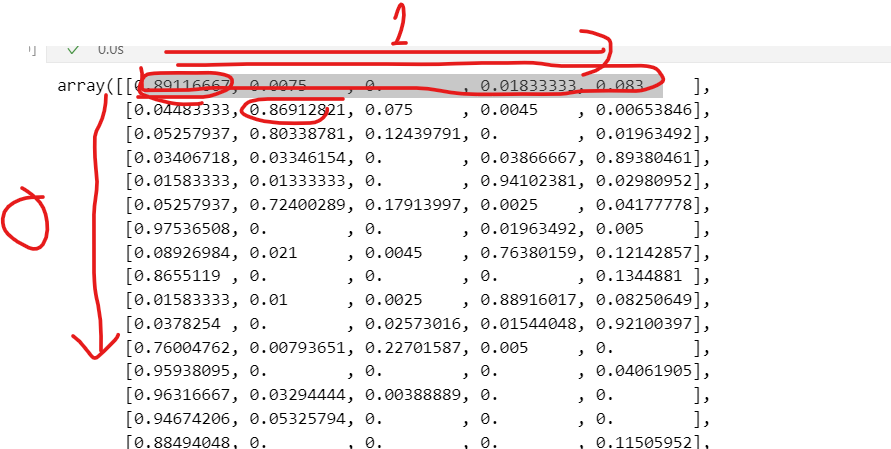

In [63]:
import numpy as np 
prob_max = np.max(prob, axis=1)
prob_max

array([0.84333333, 0.76194078, 0.76539305, 0.93250216, 0.93046356,
       0.68678716, 0.94490165, 0.80442208, 0.85222222, 0.89946356,
       0.89063709, 0.77342424, 0.95488095, 0.91545238, 0.91622222,
       0.81093651, 0.99666667, 0.70486081, 0.93076923, 0.91954762,
       0.94101282, 0.96233333, 0.98966667, 0.72927411, 0.99666667,
       0.91622222, 0.72429382, 0.89946356, 0.81989305, 0.95367949])

# Save above probabilities and preds in xnew

In [64]:
xnew['Drug_pred']=pred 
xnew['Drug_prob']=prob_max

In [65]:
xnew

,Age,Sex,BP,Cholesterol,Na_to_K,Drug_pred,Drug_prob
0,26,M,LOW,NORMAL,20.909,DrugY,0.843333
1,35,F,HIGH,HIGH,12.894,drugA,0.761941
2,48,M,HIGH,NORMAL,10.446,drugA,0.765393
3,40,F,NORMAL,HIGH,10.103,drugX,0.932502
4,16,M,LOW,HIGH,12.006,drugC,0.930464
5,49,M,HIGH,NORMAL,8.700,drugA,0.686787
6,58,F,LOW,HIGH,26.645,DrugY,0.944902
7,28,F,LOW,HIGH,13.127,drugC,0.804422
8,50,F,NORMAL,NORMAL,17.211,DrugY,0.852222
9,23,M,LOW,HIGH,7.298,drugC,0.899464


In [66]:
xnew['Drug_pred'].value_counts()

Drug_pred
DrugY    16
drugA     5
drugC     4
drugX     3
drugB     2
Name: count, dtype: int64

<Axes: title={'center': 'Countplot for out of sample predictions'}, xlabel='Drug_pred'>

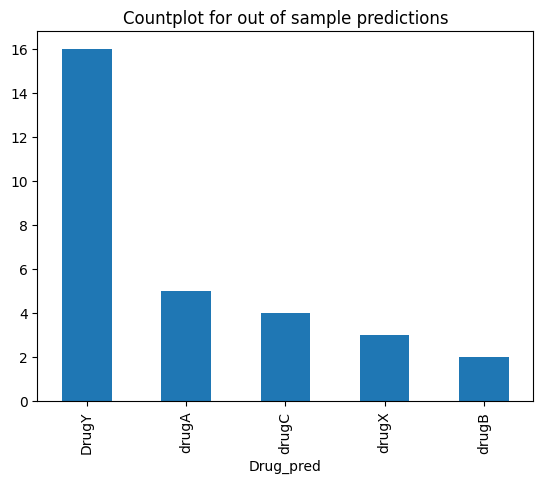

In [67]:
xnew['Drug_pred'].value_counts().plot(kind='bar', title='Countplot for out of sample predictions')

# Save above results to csv

In [68]:
xnew.to_csv('Results.csv', index=False)